In [59]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm, trange
import pyvista as pv

In [60]:
n_rods = 20
a = 2.5  # Range for uniform scattering
rods_list = []

def rotation_matrix_3d(theta, phi):
    """
    Returns a 3D rotation matrix for given angles in radians.

    Parameters:
    theta (float): The rotation angle around the z-axis in radians.
    phi (float): The rotation angle around the y-axis in radians.

    Returns:
    np.ndarray: A 3x3 rotation matrix.
    """
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    
    Ry = np.array([
        [np.cos(phi), 0, np.sin(phi)],
        [0, 1, 0],
        [-np.sin(phi), 0, np.cos(phi)]
    ])
    
    return Rz @ Ry

def schulz_distribution(mean, variance, size=1):
    """
    Generates random samples from a Schulz distribution given mean and variance.

    Parameters:
    mean (float): Mean of the Schulz distribution.
    variance (float): Variance of the Schulz distribution.
    size (int or tuple of ints): Output shape. If the given shape is, e.g., (m, n, k), 
                                 then m * n * k samples are drawn.

    Returns:
    np.ndarray: An array of random samples from the Schulz distribution.
    """
    # Calculate the shape parameter z and scale parameter lambda
    lambda_ = mean
    z = (mean**2 / variance) - 1
    
    # The Schulz distribution can be generated using the Gamma distribution
    shape = z + 1
    scale = lambda_ / (z + 1)
    return np.random.gamma(shape, scale, size)

rod_z = np.array([[0, 0, -1], [0, 0, 1]]) / 2

for i in range(n_rods):
    theta = np.random.uniform(0, 2 * np.pi)
    phi = np.random.uniform(0, np.pi)
    length = schulz_distribution(2, 0.25)
    center = np.random.uniform(-a, a, 3)
    rod_i = length * (rotation_matrix_3d(theta, phi) @ rod_z.T).T
    rod_i = (rod_i + center)
    rods_list.append(rod_i)

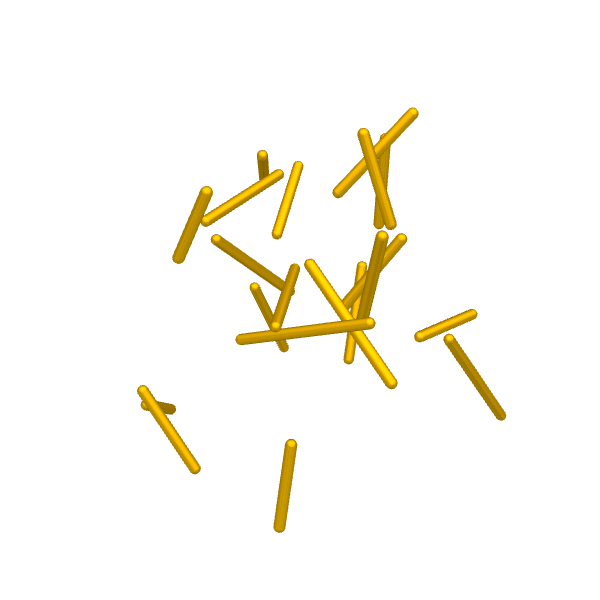

In [61]:
# Visualization
pv.set_plot_theme('document')
pl = pv.Plotter(window_size=[600, 600])
pl.enable_anti_aliasing('msaa')
    
for rod in rods_list:
    point_a = rod[0,:]
    point_b = rod[1,:]
    direction = point_b - point_a
    length = np.linalg.norm(direction)
    direction = direction / length
    radius = 0.1
    cylinder = pv.Cylinder(center=(point_a + point_b) / 2, direction=direction, radius=radius, height=length)
    pl.add_mesh(cylinder, color='#FFC000', ambient=0.4, diffuse=0.2, specular=0.7, specular_power=1,
                    smooth_shading=True, 
                    opacity=1)
    
    # Add spheres at the ends of the cylinder
    sphere_radius = radius  # Adjust this value to change the size of the spheres
    sphere_a = pv.Sphere(center=point_a, radius=sphere_radius)
    sphere_b = pv.Sphere(center=point_b, radius=sphere_radius)
    pl.add_mesh(sphere_a, color='#FFC000', ambient=0.4, diffuse=0.2, specular=0.7, specular_power=1,
                    smooth_shading=True, 
                    opacity=1)
    pl.add_mesh(sphere_b, color='#FFC000', ambient=0.4, diffuse=0.2, specular=0.7, specular_power=1,
                    smooth_shading=True, 
                    opacity=1)

# Set the camera position to view along y-axis
pl.camera.azimuth = 0
pl.camera.elevation = 0

# Set the camera to use orthogonal projection
pl.camera_parallel_projection = False

pl.screenshot("rods_no_shear.png")

from IPython.display import Image
Image(filename='rods_no_shear.png')

In [82]:
n_rods = 20
a = 2.5  # Range for uniform scattering
rods_list = []

def rotation_matrix_3d(theta, phi):
    """
    Returns a 3D rotation matrix for given angles in radians.

    Parameters:
    theta (float): The rotation angle around the z-axis in radians.
    phi (float): The rotation angle around the y-axis in radians.

    Returns:
    np.ndarray: A 3x3 rotation matrix.
    """
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    
    Ry = np.array([
        [np.cos(phi), 0, np.sin(phi)],
        [0, 1, 0],
        [-np.sin(phi), 0, np.cos(phi)]
    ])
    
    return Rz @ Ry

def schulz_distribution(mean, variance, size=1):
    """
    Generates random samples from a Schulz distribution given mean and variance.

    Parameters:
    mean (float): Mean of the Schulz distribution.
    variance (float): Variance of the Schulz distribution.
    size (int or tuple of ints): Output shape. If the given shape is, e.g., (m, n, k), 
                                 then m * n * k samples are drawn.

    Returns:
    np.ndarray: An array of random samples from the Schulz distribution.
    """
    # Calculate the shape parameter z and scale parameter lambda
    lambda_ = mean
    z = (mean**2 / variance) - 1
    
    # The Schulz distribution can be generated using the Gamma distribution
    shape = z + 1
    scale = lambda_ / (z + 1)
    return np.random.gamma(shape, scale, size)

rod_z = np.array([[0, 0, -1], [0, 0, 1]]) / 2

for i in range(n_rods):
    theta = np.random.uniform(0, 2 * np.pi)
    phi = np.random.uniform(-np.pi/3, np.pi/3)
    length = schulz_distribution(0.6, 0.001)
    center = np.random.uniform(-a, a, 3)
    rod_i = length * (rotation_matrix_3d(theta, phi) @ rod_z.T).T
    rod_i = (rod_i + center)
    rods_list.append(rod_i)

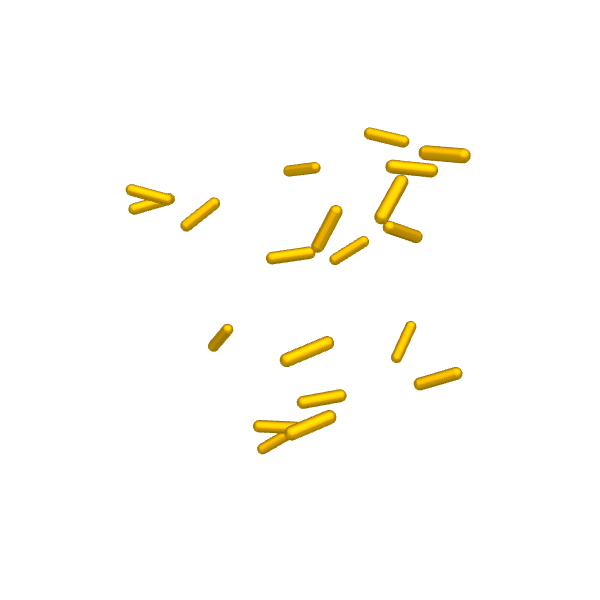

In [83]:
# Visualization
pv.set_plot_theme('document')
pl = pv.Plotter(window_size=[600, 600])
pl.enable_anti_aliasing('msaa')
    
for rod in rods_list:
    point_a = rod[0,:]
    point_b = rod[1,:]
    direction = point_b - point_a
    length = np.linalg.norm(direction)
    direction = direction / length
    radius = 0.1
    cylinder = pv.Cylinder(center=(point_a + point_b) / 2, direction=direction, radius=radius, height=length)
    pl.add_mesh(cylinder, color='#FFC000', ambient=0.4, diffuse=0.2, specular=0.7, specular_power=1,
                    smooth_shading=True, 
                    opacity=1)
    
    # Add spheres at the ends of the cylinder
    sphere_radius = radius  # Adjust this value to change the size of the spheres
    sphere_a = pv.Sphere(center=point_a, radius=sphere_radius)
    sphere_b = pv.Sphere(center=point_b, radius=sphere_radius)
    pl.add_mesh(sphere_a, color='#FFC000', ambient=0.4, diffuse=0.2, specular=0.7, specular_power=1,
                    smooth_shading=True, 
                    opacity=1)
    pl.add_mesh(sphere_b, color='#FFC000', ambient=0.4, diffuse=0.2, specular=0.7, specular_power=1,
                    smooth_shading=True, 
                    opacity=1)

# Set the camera position to view along y-axis
pl.camera.azimuth = 0
pl.camera.elevation = 0
pl.view_vector((0, -1, 0), (-1, 0, 0.2))

# Set the camera to use orthogonal projection
pl.camera_parallel_projection = False
# pl.show_axes()

pl.screenshot("rods_shear.png")

from IPython.display import Image
Image(filename='rods_shear.png')